In [80]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
%matplotlib inline

colors = {"traj":"#902D0B","gt":"#74017C", "trajF":"#9CAB4A", "trajFi":"#009446", "trajFia":"#183A71" , "trajlstm":"#DD9218"}
names = {"traj":"Concatenation","trajlstm":"Memory","gt":"Ground Truth", "trajF":"F - Temporal Conv", "trajFi":"F - Iterative (No Attn)", "trajFia":"F - Iterative (Ours)" , "traj_tconv":"Temporal Conv"}

def plotcurve(rmeansize, seen, split, structure, num, method):
    name = "exp/1_" + method + "_S" +str(seen)+ "_" + structure + "_H"+str(num)+"_N"+str(num)+"_T"+split+"successrate.txt"
    r8 = np.loadtxt(name)
    movingmean8 = []
    for i in range(len(r8)-rmeansize):
        movingmean8.append(r8[i :i+rmeansize].mean())
    if split == "train":
        plt.plot(movingmean8[:], color=colors[method], linestyle="dashed" , alpha=0.4) 
    else:
        plt.plot(movingmean8[:], label=names[method], color=colors[method]) 
        
        

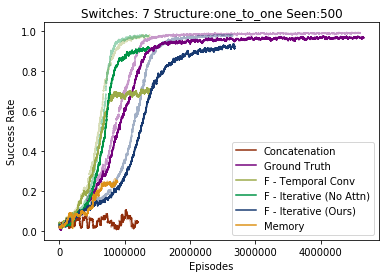

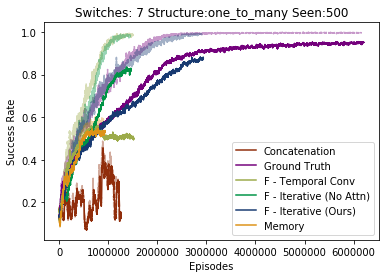

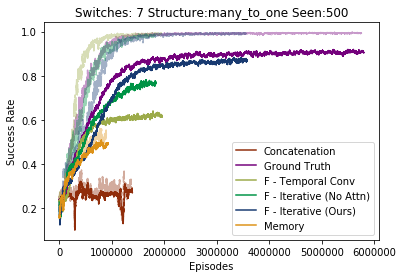

In [63]:
nums = [7]
splits = ["train", "test"]
structs = ["one_to_one", "one_to_many","many_to_one"]#,"masterswitch"]
methods = ["traj","gt", "trajF", "trajFi", "trajFia","trajlstm"]
seens = [500]


for n in nums:
    for sn in seens:
        for st in structs:
            for spl in splits:
                for m in methods:
                    try:
                        plotcurve(10000, sn, spl, st, n, m)
                    except:
                        print("MISSING:", n, sn, st, spl, m)
            plt.title("Switches: " + str(n) + " Structure:" + str(st) + " Seen:" + str(sn))
            plt.xlabel("Episodes")
            plt.ylabel("Success Rate")
            plt.legend()
            plt.show()

            plt.close()

In [89]:
def barplot(size, structure, num, spl):
    n_groups = 4
    
    means_tr = {}
    stderr_tr = {}
#     means_ts = {}
#     stderr_ts = {}
#     for spl in ["train", "test"]:
    for m in ["traj", "trajlstm", "trajF", "trajFi", "trajFia", "gt"]:
        means_tr[m] = []
        stderr_tr[m] = []

        for seen in [10,50,100, 500]:
            try:
                name = "exp/1_Redo_" + m + "_S" +str(seen)+ "_" + structure + "_H"+str(num)+"_N"+str(num)+"_T"+spl+"successrate.txt"
                r8 = np.loadtxt(name)[-size:]
            except:
                name = "exp/1_" + m + "_S" +str(seen)+ "_" + structure + "_H"+str(num)+"_N"+str(num)+"_T"+spl+"successrate.txt"
                r8 = np.loadtxt(name)[-size:]
            print(len(r8))

#                 if spl == "train":
            means_tr[m].append(np.mean(r8))
            stderr_tr[m].append(np.std(r8) / np.sqrt(len(r8)))
#                 else:
#                     means_ts[m].append(np.mean(r8))
#                     stderr_ts[m].append(np.std(r8) / np.sqrt(len(r8)))

#     print(means_tr,stderr_tr,means_ts,stderr_ts )
    fig, ax = plt.subplots(dpi=300)

    index = np.arange(n_groups)
    bar_width = 0.15
    dels = [-2*bar_width, -1*bar_width, 0, bar_width, 2*bar_width]
    
    
    opacity = 0.8
    error_config = {'ecolor': '0.3'}
    
    for i, m in enumerate(["traj", "trajlstm", "trajF", "trajFi", "trajFia", "gt"]):
#         ax.bar(index+dels[i], means_tr[m], bar_width,
#                 alpha=opacity, edgecolor="white",
#                 yerr=stderr_tr[m], error_kw=error_config,
#                 label=names[m], color = colors[m])
        ax.errorbar(index, means_tr[m],
                alpha=opacity,
                yerr=stderr_tr[m], ms=10, marker=".",
                label=names[m], color = colors[m], linewidth=4)
        
    if spl == "train":
        wrd = "Seen"
    else:
        wrd = "Unseen"
    ax.set_ylabel('Success Rate', fontsize=20)
    ax.set_xlabel('Number of Seen Causal Structures', fontsize=20)
    if structure == "one_to_one":
        ax.set_title('One-to-One', fontsize=20)
    elif structure == "one_to_many":
        ax.set_title('One-to-Many', fontsize=20)
    elif structure == "many_to_one":
        ax.set_title('Many-to-One', fontsize=20)
    elif structure == "masterswitch":
        ax.set_title('Masterswitch', fontsize=20)
#     ax.set_title(wrd+' Causal Structures')
    ax.set_xticks(index)
    ax.set_xticklabels(('10', '50', '100', '500'), fontsize=20)
    ax.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
    ax.set_yticklabels([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], fontsize=20)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=3)
#     ax.legend()

    fig.tight_layout()
    plt.savefig("figs/test"+str(structure)+"_"+str(num) + "_"+str(spl)+".pdf")
#     plt.show()
            
                

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000


/cvgl2/u/surajn/anaconda2/envs/py35/lib/python3.5/site-packages/matplotlib/figure.py:2362: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


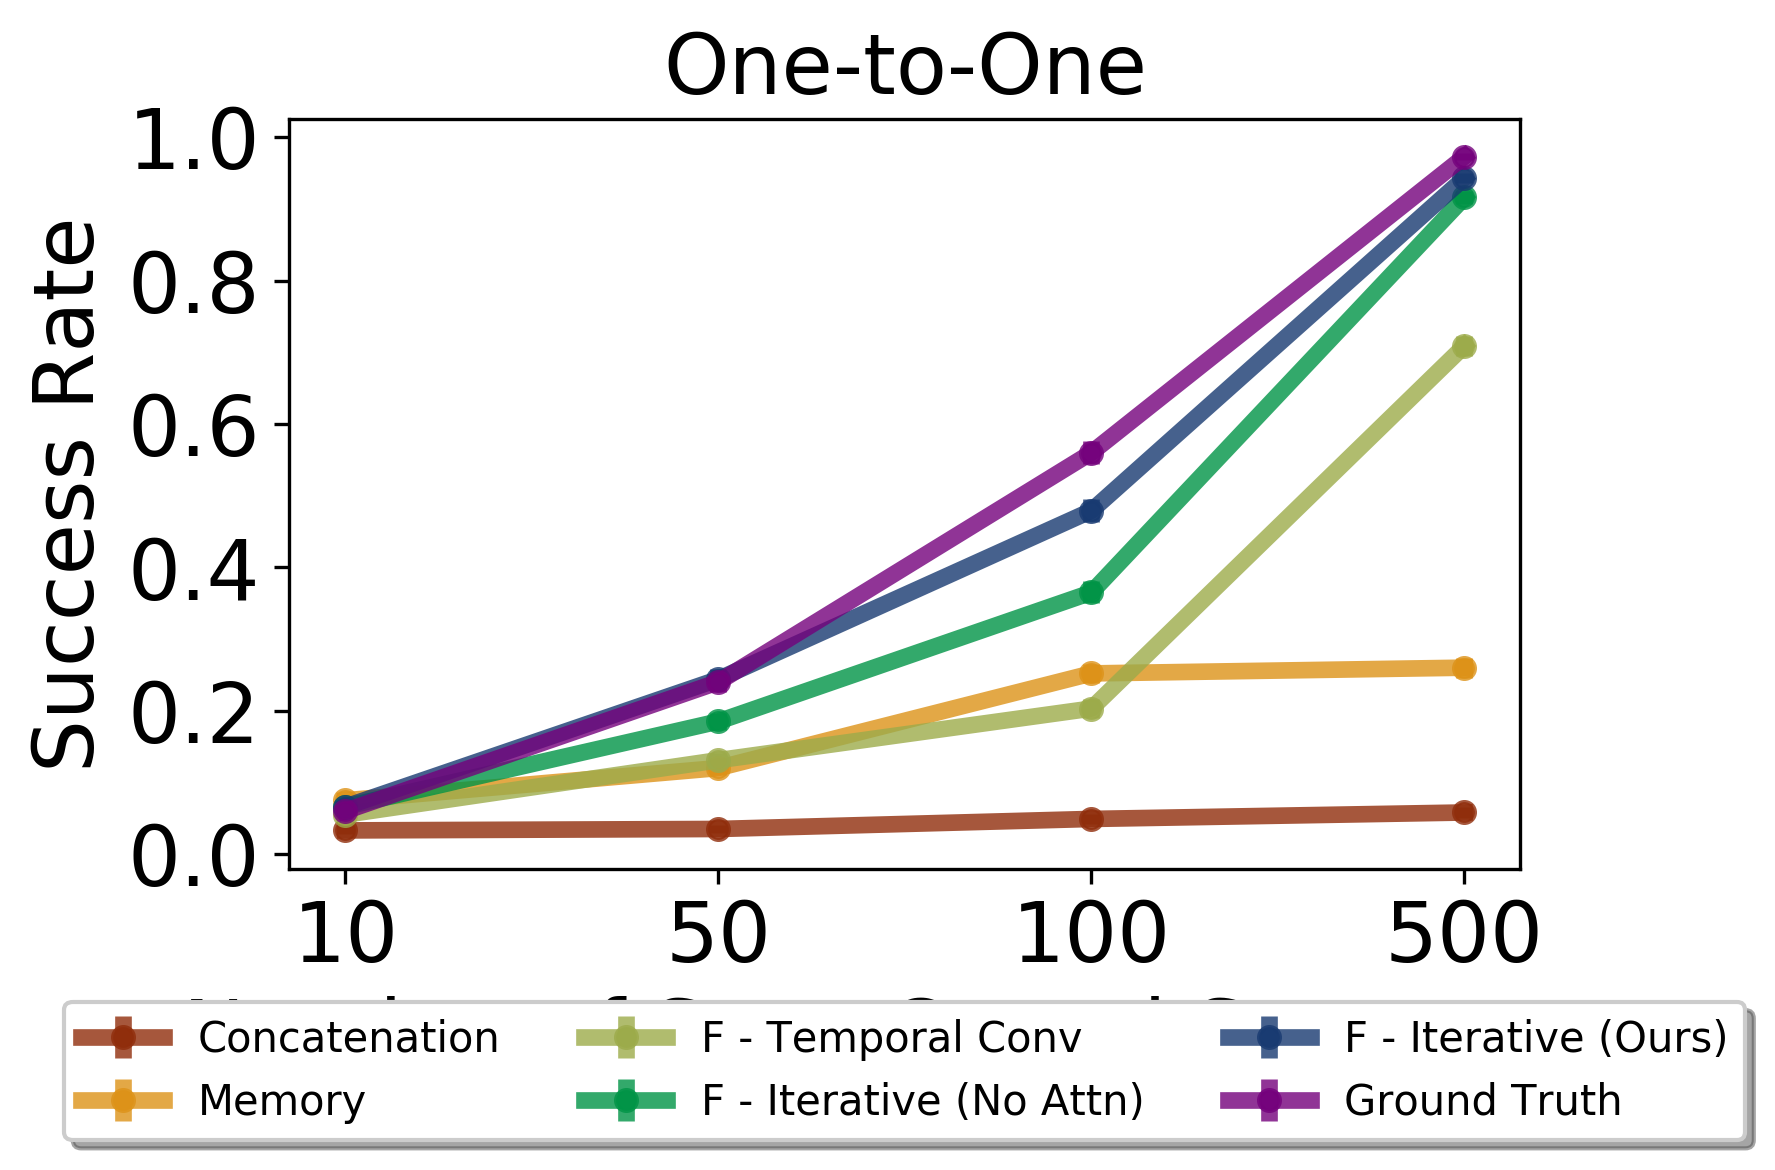

In [90]:
            
# barplot(1000, "one_to_one", 7, "train")
barplot(1000, "one_to_one", 7, "test")
            
# barplot(1000, "one_to_many", 7, "train")
# barplot(1000, "one_to_many", 7, "test")
#             
# barplot(1000, "many_to_one", 7, "train")
# barplot(1000, "many_to_one", 7, "test")
            
# barplot(1000, "masterswitch", 7, "train")
# barplot(1000, "masterswitch", 7, "test")